# Linear Exercise

뉴욕에 위치한 한 이커머스 회사가 있습니다. 이 회사는 온라인에서 옷을 판매하면서 오프라인 스토어에서(in-store) 스타일링이나 옷에 관한 조언을 하는 세션을 열기도 합니다.  
고객들은 스토어에 방문해서 스타일리스트와의 세션이나 미팅을 갖게 되고 집으로 돌아가서 모바일앱 또는 웹사이트에서 원하는 옷을 주문하는 구조입니다.  

이 회사는 모바일앱 또는 웹사이트에 집중해야 할지를 데이터를 기반으로 결정하려고 합니다.

아래 절차를 따라 커스터머 데이터를 분석하세요.

## Imports
**pandas, numpy, matplotlib, sklearn 등 필요할 때마다 라이브러리 추가**

In [3]:
# CODE HERE
# 필요 모듈 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

c:\Users\user\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Get the Data

회사에서 제공한 CSV 파일에는 이메일, 주소, 아바타 색깔(Avatar) 등의 고객정보와 함께 아래와 같은 칼럼의 숫자 데이터들이 포함되어있습니다.

* Avg. Session Length: 평균 in-store 스타일링 세션 시간
* Time on App: 앱에서 소비한 시간(분)
* Time on Website: 웹사이트에서 소비한 시간(분)
* Length of Membership: 회원가입 기간 (년)
* Yearly Amount Spent : 회원의 연간 매출 (달러) 


**EcommerceCustomers.csv 파일을 읽고 df 라는 이름의 DataFrame 을 만들고 첫 5개 샘플을 확인합니다.**

In [4]:
# CODE HERE

df = pd.read_csv('./data/EcommerceCustomers.csv')
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


**info() 메소드를 호출하여 데이터의 간략한 정보를 확인합니다.**

In [5]:
# CODE HERE
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


## Data Split

**DataFrame에서 데이터타입이 float인 데이터 컬럼들만 셀렉트해서 변수 X 에 저장하고, 'Yearly Amount Spent' 컬럼은 변수 y 에 저장하세요**  
**데이터가 의도한 대로 분할 되었는지 X를 호출하여 데이터를 확인합니다.**

In [6]:
# CODE HERE

X = df.select_dtypes(float)
y = X.pop('Yearly Amount Spent')
X


,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308
...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573
496,34.702529,11.695736,37.190268,3.576526
497,32.646777,11.499409,38.332576,4.958264
498,33.322501,12.391423,36.840086,2.336485


,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308
...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573
496,34.702529,11.695736,37.190268,3.576526
497,32.646777,11.499409,38.332576,4.958264
498,33.322501,12.391423,36.840086,2.336485


**sklearn 의 model_selection.train_test_split 함수를 호출해서 training 데이터와 testing 데이터로 7:3 으로분리하세요.**  
**random_state=42 파라메터를 추가하여 각 데이터셋에 분할되는 데이터를 고정시키겠습니다.**  
**데이터 분할 후 각 데이터셋의 shape을 X_train, X_test, y_train, y_test순으로 확인합니다.**

In [7]:
# CODE HERE
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42,test_size=0.3)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((350, 4), (150, 4), (350,), (150,))

((350, 4), (150, 4), (350,), (150,))

## Training the Model

**sklearn.linear_model 의 LinearRegression 을 import**

In [8]:
# CODE HERE

from sklearn.linear_model import LinearRegression

In [35]:
# 실행 출력 결과 없음

**LinearRegression() 인스턴스를 생성해서 model 에 저장**

In [9]:
# CODE HERE
lr = LinearRegression()

In [36]:
# 실행 출력 결과 없음

**training 데이터에 대해 모델 학습**

In [10]:
# CODE HERE

lr.fit(X_train, y_train)

LinearRegression()

LinearRegression()

**학습된 모델의 coefficients 출력**

In [11]:
# CODE HERE
lr.coef_

array([25.72425621, 38.59713548,  0.45914788, 61.67473243])

Coefficients:
[25.72425621 38.59713548  0.45914788 61.67473243]


## Predicting Test Data

**model.predict() 메소드를 호출하여 X_test 데이터에 대한 모델의 예측값을 확인합니다.**

In [12]:
# CODE HERE
lr_pred = lr.predict(X_test)
lr_pred

array([403.66993069, 542.57756289, 427.06591658, 502.02460425,
       410.12143559, 569.93442508, 531.93431341, 506.29650969,
       408.71870658, 473.97737105, 441.46912726, 425.33703059,
       425.1297229 , 527.61676714, 431.45684016, 424.0769184 ,
       575.76543296, 484.89856554, 458.35936863, 481.96502182,
       502.32441491, 513.63783554, 507.58877002, 646.57464283,
       450.24372141, 496.27043415, 556.40457807, 554.95630839,
       399.64237199, 325.84623136, 532.89783259, 478.12238702,
       501.05701845, 305.97335848, 505.77244448, 483.79591969,
       518.8331528 , 438.18241857, 456.71094234, 471.04609461,
       494.44008972, 445.31155755, 508.78802753, 501.04594193,
       488.83499673, 535.38079541, 595.20129802, 514.04714872,
       280.76758312, 433.10112367, 421.70823427, 481.23640152,
       584.71372272, 608.7748096 , 563.98513427, 494.72804869,
       394.52133407, 456.4197529 , 573.08767515, 499.6984241 ,
       512.83277025, 392.12434043, 480.05057697, 481.54

array([403.66993069, 542.57756289, 427.06591658, 502.02460425,
       410.12143559, 569.93442508, 531.93431341, 506.29650969,
       408.71870658, 473.97737105, 441.46912726, 425.33703059,
       425.1297229 , 527.61676714, 431.45684016, 424.0769184 ,
       575.76543296, 484.89856554, 458.35936863, 481.96502182,
       502.32441491, 513.63783554, 507.58877002, 646.57464283,
       450.24372141, 496.27043415, 556.40457807, 554.95630839,
       399.64237199, 325.84623136, 532.89783259, 478.12238702,
       501.05701845, 305.97335848, 505.77244448, 483.79591969,
       518.8331528 , 438.18241857, 456.71094234, 471.04609461,
       494.44008972, 445.31155755, 508.78802753, 501.04594193,
       488.83499673, 535.38079541, 595.20129802, 514.04714872,
       280.76758312, 433.10112367, 421.70823427, 481.23640152,
       584.71372272, 608.7748096 , 563.98513427, 494.72804869,
       394.52133407, 456.4197529 , 573.08767515, 499.6984241 ,
       512.83277025, 392.12434043, 480.05057697, 481.54

**실제 정답값(y_test)과 예측값의 관계를 확인하고자 X축에 예측값, y축에 정답값을 전달하여 scatterplot 으로 시각화 하세요.**

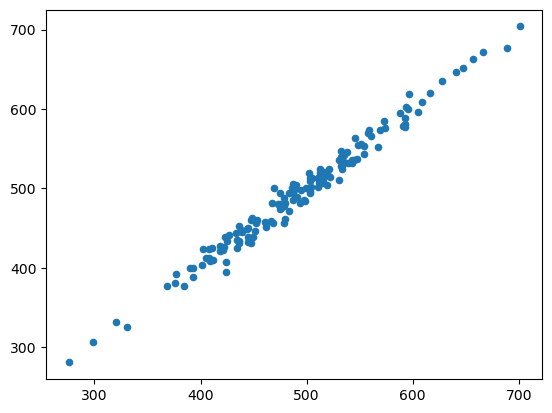

In [26]:
# CODE HERE
plt.scatter(y_test,lr_pred, s=20)

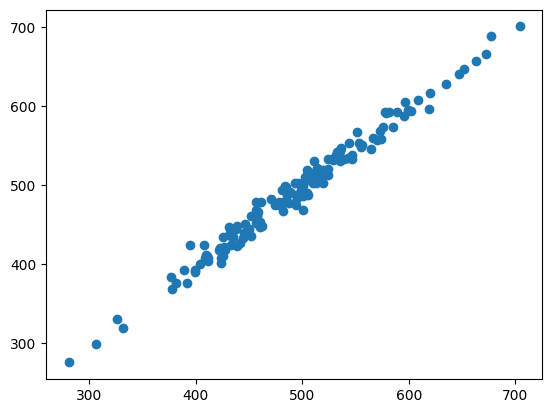

## Evaluating the Model
**sklearn 의 metircs중 예측모델 평가지표 출력을 위한 메소드를 import 한 후 R2 score, RMSE를 계산하세요.**

In [27]:
# CODE HERE
from sklearn.metrics import r2_score, mean_squared_error
print(f'R2 score: {r2_score(y_test, lr_pred)}')   # 정답에 해당하는 y_test 먼저
print(f'RMSE:{mean_squared_error(y_test, lr_pred, squared=False)}')  ## squared가 폴스면 루트 씌우는거

R2 score: 0.9808757641125854
RMSE:10.193897260863181


R2 score: 0.9806128539052734
RMSE: 10.193897260863158


## Conclusion

처음 문제로 돌아와서 모바일앱 또는 웹사이트 중 어떤 채널에 집중하여 투자할지를 결정해야 합니다. 어쩌면 그보다 더 중요한 채널이 있을 수도 있습니다.  
coefficient 를 살펴보면서 생각해봅시다.  
**아래와 같이 coeffecient 에 대한 DataFrame 을 만드세요.**

In [20]:
# CODE HERE

import pandas as pd
codf = pd.DataFrame(lr.coef_, index=X.columns ,columns=['Coeffecient'])   ### 인덱스를 하면 열  / 컬럼은 행
codf 

,Coeffecient
Avg. Session Length,25.724256
Time on App,38.597135
Time on Website,0.459148
Length of Membership,61.674732


,Coeffecient
Avg. Session Length,25.724256
Time on App,38.597135
Time on Website,0.459148
Length of Membership,61.674732


**이러한 계수를 어떻게 해석할 수 있습니까?**

In [ ]:
# 오프라인에서 고객이 1분 머무를 때 마다 연간 구매금액이 25.72달러 상승하는 경향을 보인다.
# 고객이 1년 멤버쉽 유지를 할 때 마다 61.67달러 구매금액이 상승하는 경향을 보인다.

**이 회사가 모바일앱 또는 웹사이트 운영에 집중투자해야한다고 생각하세요? 추가적으로 취해야 할 비즈니스 액션은 무엇인가요?**

In [ ]:
# 앱에 집중투자.  앱에서 멤버쉽 유지를 위한 프로모션을 진행